# LOAN PREDICTION MODEL

IMPORTING LIBRARIES

In [9]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
!pip install imblearn
import imblearn
from imblearn.over_sampling import RandomOverSampler
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
import xgboost
from xgboost import XGBClassifier

     -------------------------------------- 226.0/226.0 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


IMPORTING DATASET

In [10]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Loan_pred\Loan_Data.csv")

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DATA EXPLANATION

DATA VISUALIZATION

<AxesSubplot:>

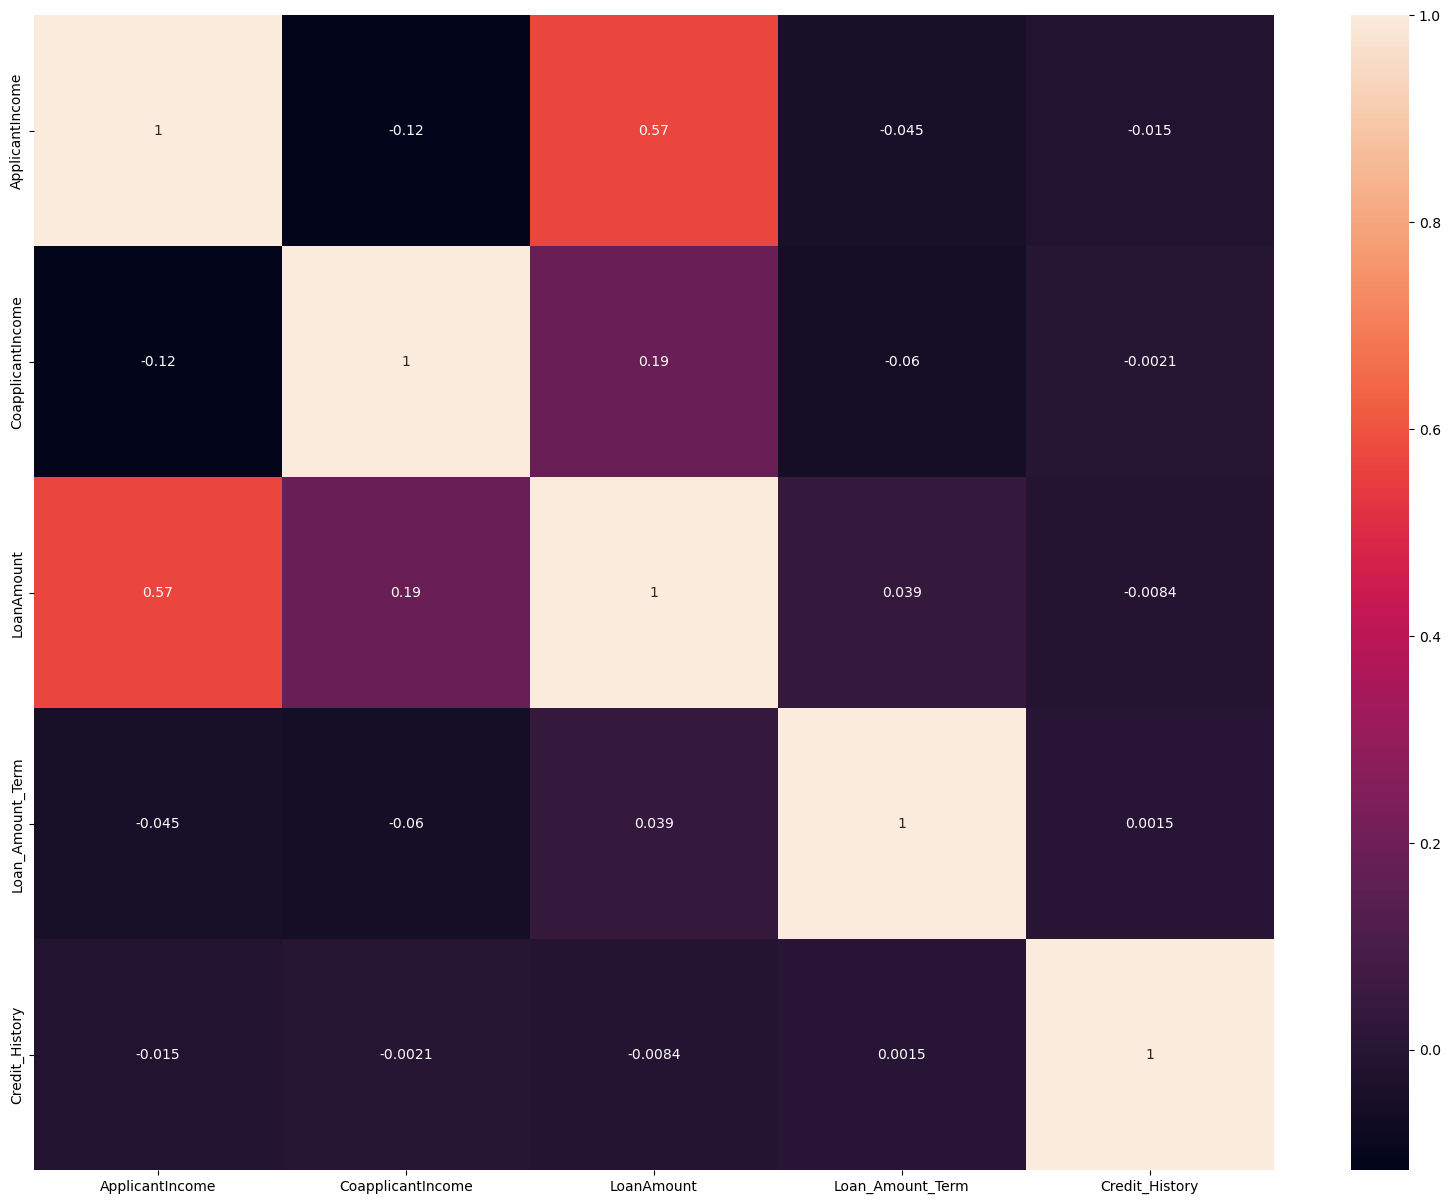

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

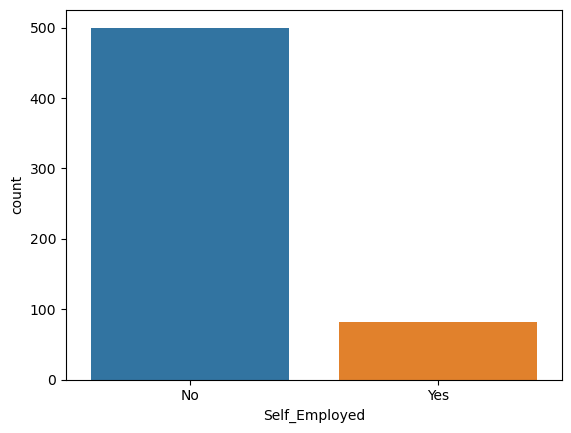

In [14]:
sns.countplot(df['Self_Employed'])

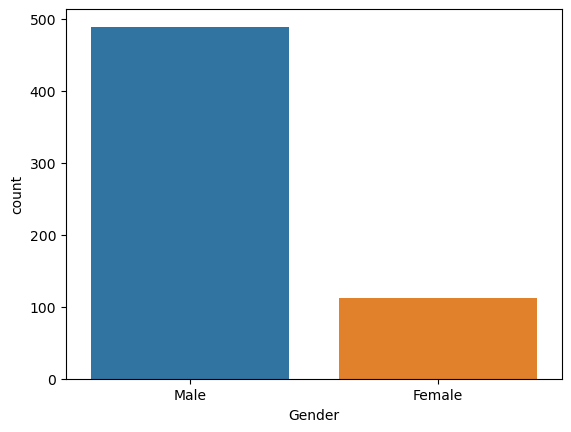

In [15]:
sns.countplot(df['Gender']);

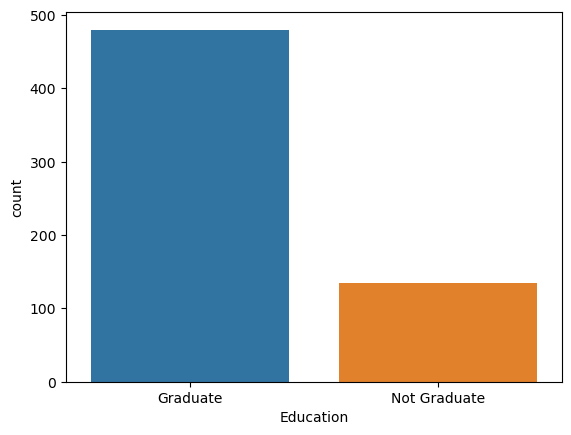

In [16]:
sns.countplot(df['Education']);

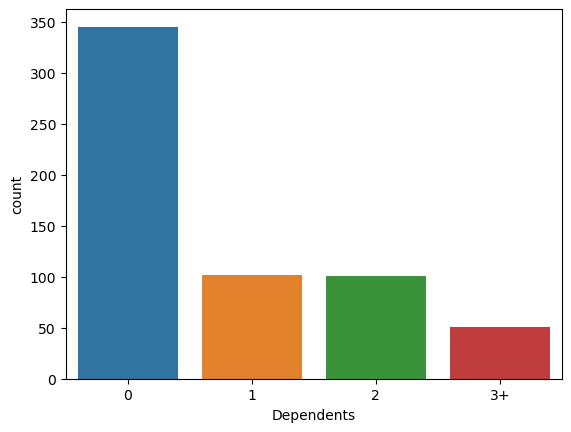

In [17]:
sns.countplot(df['Dependents']);

<AxesSubplot:xlabel='Married', ylabel='count'>

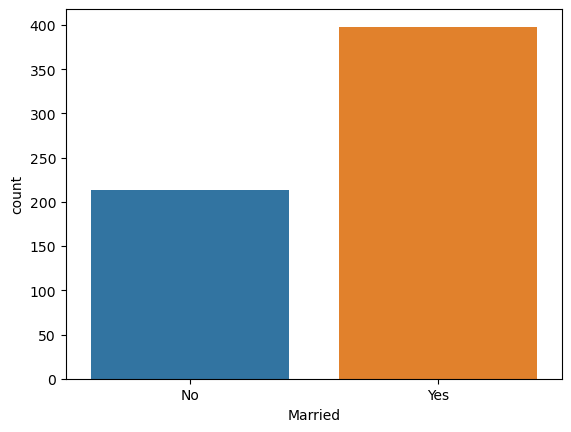

In [18]:
sns.countplot(df['Married'])

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

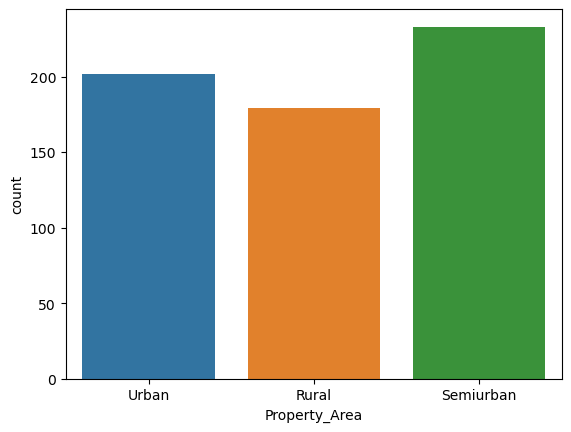

In [19]:
sns.countplot(df['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

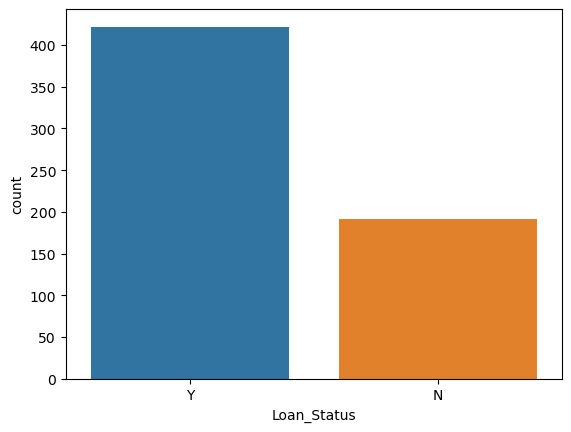

In [20]:
sns.countplot(df['Loan_Status'])

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

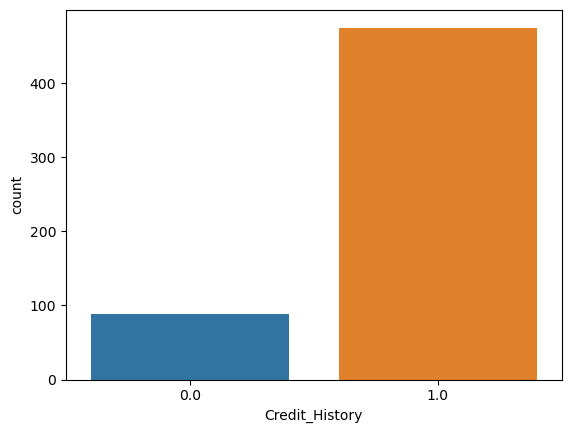

In [21]:
sns.countplot(df['Credit_History'])

[Text(0.5, 0, 'Loan Amount'), Text(0, 0.5, 'Number of provided Loans')]

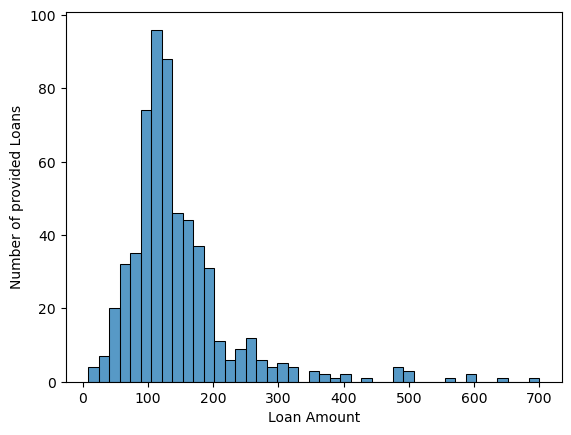

In [22]:
sns.histplot(df['LoanAmount']).set(xlabel='Loan Amount', ylabel='Number of provided Loans')

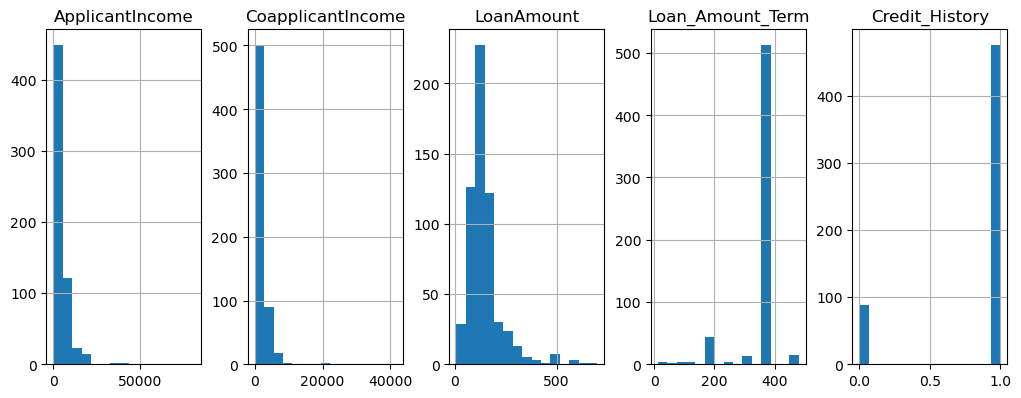

In [23]:
df.hist(bins=15, figsize=(15, 10), layout=(2, 6));

EXPLORATORY DATA ANALYSIS

In [24]:
df.shape

(614, 13)

In [25]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [27]:
#treating null values
df = df[df['Credit_History'].notnull()]

In [28]:
#categorical values
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [29]:
#numerical values
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [30]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

CATEGORICAL TO NUMERICAL CONVERSION

In [32]:
lc=LabelEncoder()

In [33]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [34]:
df['Loan_ID']= lc.fit_transform(df['Loan_ID'])
df['Gender']= lc.fit_transform(df['Gender'])
df['Married']= lc.fit_transform(df['Married'])
df['Education']= lc.fit_transform(df['Education'])
df['Dependents']= lc.fit_transform(df['Dependents'])
df['Self_Employed']= lc.fit_transform(df['Self_Employed'])
df['Property_Area']= lc.fit_transform(df['Property_Area'])
df['Loan_Status']= lc.fit_transform(df['Loan_Status'])

In [35]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

FEATURE SELECTION

In [36]:
#feature selection

In [37]:
formula='Loan_Status~Loan_ID+Gender+Married+Dependents+Education+Self_Employed+ApplicantIncome+CoapplicantIncome+LoanAmount+Loan_Amount_Term+Credit_History+Property_Area'
model=smf.ols(formula,data=df).fit()

In [38]:
print(model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.317   
Dependent Variable: Loan_Status      AIC:                536.6692
Date:               2023-01-13 00:06 BIC:                593.0249
No. Observations:   564              Log-Likelihood:     -255.33 
Df Model:           12               F-statistic:        22.79   
Df Residuals:       551              Prob (F-statistic): 3.56e-41
R-squared:          0.332            Scale:              0.14821 
-----------------------------------------------------------------
                    Coef.  Std.Err.    t    P>|t|   [0.025 0.975]
-----------------------------------------------------------------
Intercept           0.0663   0.1210  0.5477 0.5841 -0.1714 0.3039
Loan_ID             0.0001   0.0001  0.8681 0.3857 -0.0001 0.0003
Gender              0.0138   0.0460  0.2996 0.7646 -0.0765 0.1041
Married             0.0820   0.0388  2.1169 0.0347  0.0059 0.1581
Dependents          0.0103 

In [39]:
#AS THIS SHOWS THAT STRONG MULTICOLLINEARITY SO I'LL USE VIF TO REMOVE COLINEARITY

In [40]:
X=df.drop(['Loan_Status'],axis=1)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [41]:
print(vif)

    VIF Factor           features
0     3.789911            Loan_ID
1     6.165100             Gender
2     3.661000            Married
3     1.840667         Dependents
4     1.300368          Education
5     1.176682      Self_Employed
6     2.840330    ApplicantIncome
7     1.573316  CoapplicantIncome
8     6.890088         LoanAmount
9    11.722353   Loan_Amount_Term
10    5.691580     Credit_History
11    2.578904      Property_Area


In [42]:
#AS LOAN_AMOUNT_TERM HAS HIGHEST VIF FACTOR SO I'LL REMOVE IT

In [43]:
X2=X.drop(['Loan_ID','Loan_Amount_Term'],axis=1)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns

In [44]:
print(vif)

   VIF Factor           features
0    5.532051             Gender
1    3.659481            Married
2    1.828693         Dependents
3    1.261200          Education
4    1.172988      Self_Employed
5    2.825054    ApplicantIncome
6    1.573282  CoapplicantIncome
7    6.086064         LoanAmount
8    4.249258     Credit_History
9    2.363701      Property_Area


In [45]:
#AFTER REMOVING LOAN_AMOUNT_TERM THE VALUES OF VIF FACTOR HAS DECREASED

In [46]:
X2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,145.088398,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,1.0,2


In [47]:
y=df['Loan_Status']

I'M NOT REMOVING OUTLIERS AS SALARY AND LOAN AMOUNT ARE IMPORTANT AND THE VARIATIONS CAN NOT BE IGNORED

HANDLING IMBALANCE DATASET

In [48]:
df.Loan_Status.value_counts()

1    385
0    179
Name: Loan_Status, dtype: int64

In [49]:
#the dataset is not balanced
#Oversampling can be defined as adding more copies to the minority class. 
#Oversampling can be a good choice when you don’t have a ton of data to work with.

In [50]:
#pip install imblearn

In [51]:
ros = RandomOverSampler(random_state=0)

In [52]:
X, y = ros.fit_resample(X2, y)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

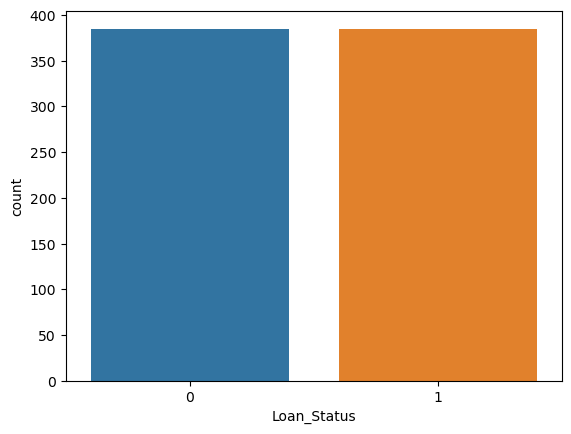

In [53]:
sns.countplot(y)

In [54]:
df1=pd.concat([X,y],axis=1)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,145.088398,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,1.0,2,1


<AxesSubplot:>

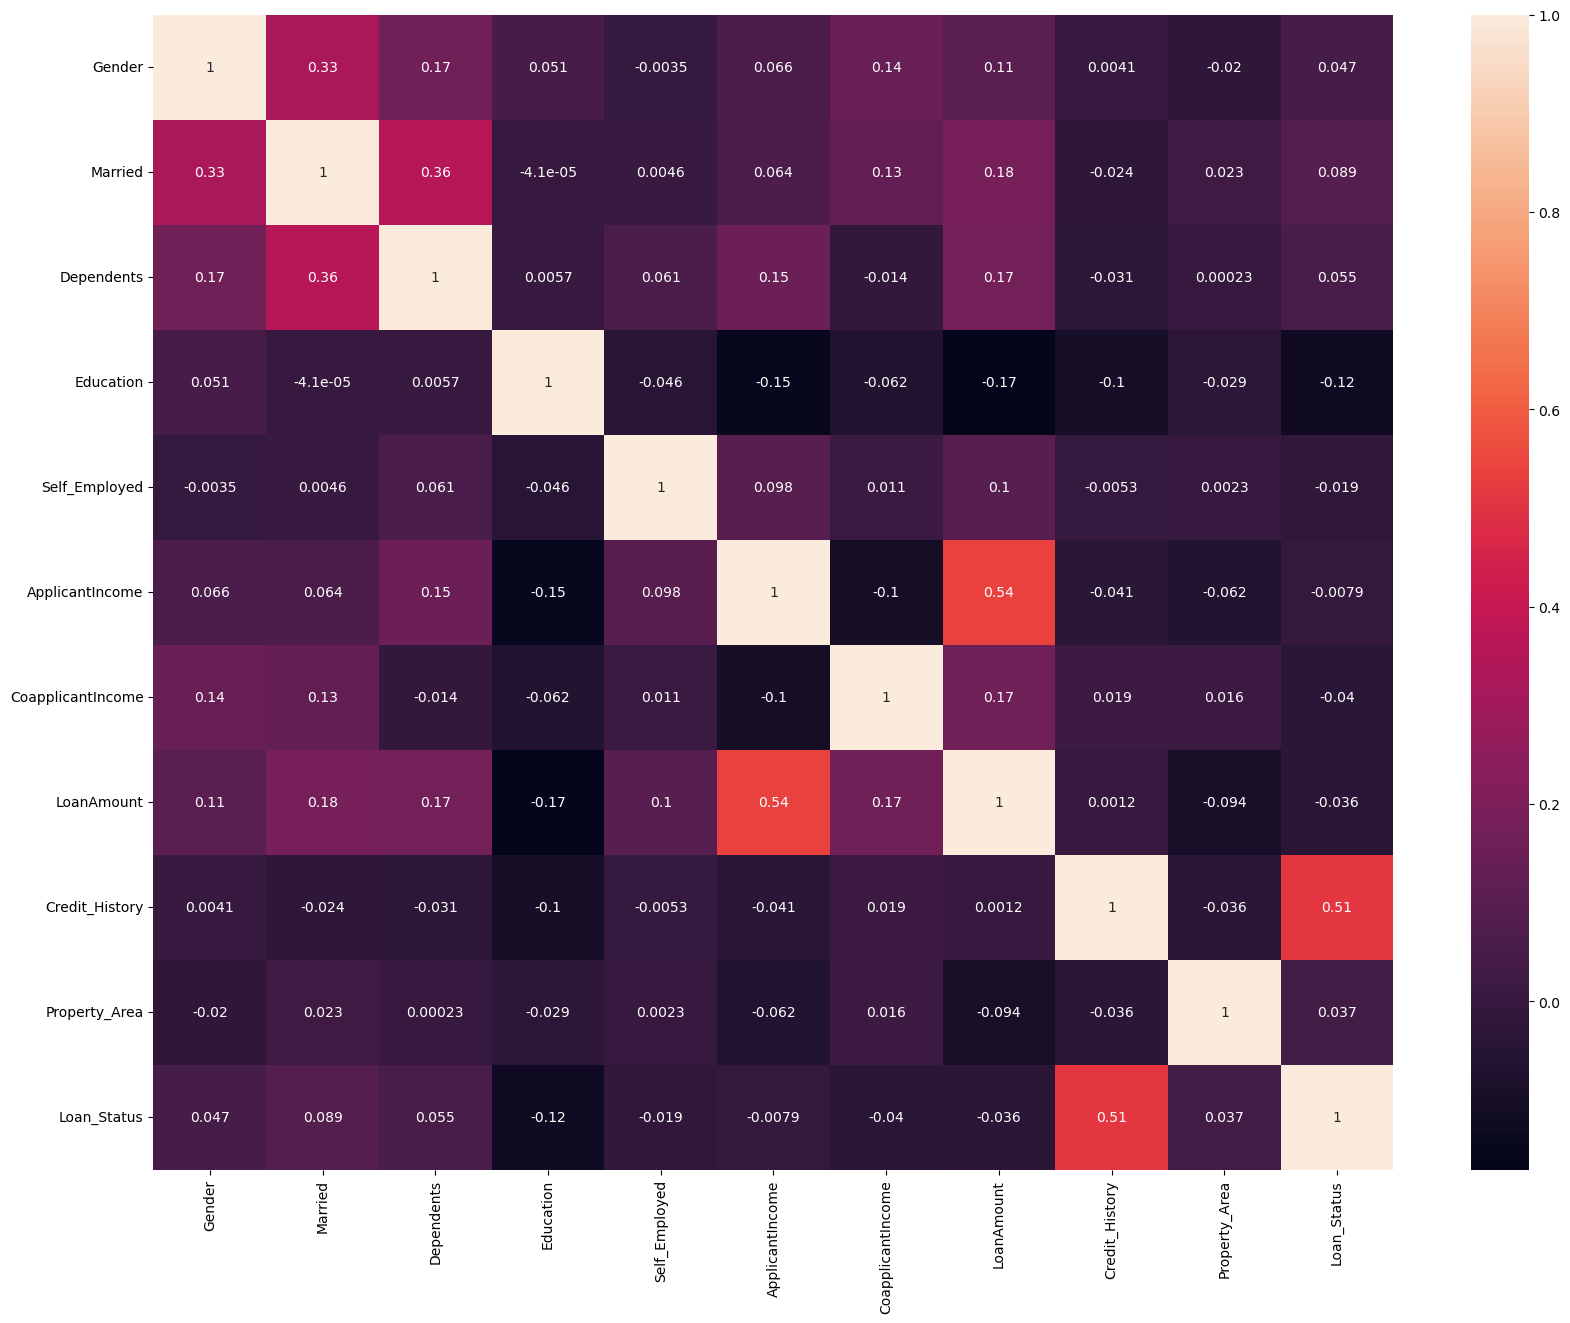

In [55]:
#CORELATION OF NEW BALANCED DATASET
plt.figure(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True)

SPLITTING THE DATASET TO TRAIN_TEST_SPLIT

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

MODELLING 

In [57]:
#LOGISTIC REGRESSION

model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

LogisticRegression()

In [58]:
y_pred_lr = model_lr.predict(X_test)

In [59]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_lr))

Accuracy :  0.6926406926406926


In [60]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.50      0.63       121
           1       0.62      0.90      0.74       110

    accuracy                           0.69       231
   macro avg       0.73      0.70      0.68       231
weighted avg       0.74      0.69      0.68       231



In [61]:

 
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
 
prediction = svc_model .predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))
print ("Accuracy : ", accuracy_score(y_test, prediction))

0.712430426716141
0.6493506493506493
Accuracy :  0.6493506493506493


In [62]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.98      0.34      0.50       121
           1       0.58      0.99      0.73       110

    accuracy                           0.65       231
   macro avg       0.78      0.66      0.62       231
weighted avg       0.79      0.65      0.61       231



In [63]:
#BUILDING A NAIVE BAYES MODEL

gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 67.09956709956711


In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.42      0.57       121
           1       0.60      0.95      0.73       110

    accuracy                           0.67       231
   macro avg       0.75      0.68      0.65       231
weighted avg       0.75      0.67      0.65       231



In [65]:
#BUILDING DECISION TREE MODEL
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [66]:
y_pred_DT= classifier.predict(X_test)

In [67]:
print ("Accuracy : ", accuracy_score(y_test, y_pred_DT))

Accuracy :  0.8484848484848485


In [68]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       121
           1       0.89      0.78      0.83       110

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231



In [69]:
#BUILDING XGBOOST MODEL

In [70]:
#!pip install xgboost

In [71]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [72]:
# make predictions for test data
y_pred_XGB = model_XGB.predict(X_test)
print("Accuracy of XGB Classifier",accuracy_score(y_test,y_pred_XGB))

Accuracy of XGB Classifier 0.8787878787878788


In [73]:
print(classification_report(y_test,y_pred_XGB))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       121
           1       0.94      0.80      0.86       110

    accuracy                           0.88       231
   macro avg       0.89      0.88      0.88       231
weighted avg       0.89      0.88      0.88       231



In [74]:

# importing random forest classifier from assemble module

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

# performing predictions on the test dataset
y_pred_RF = clf.predict(X_test)

# metrics are used to find accuracy or error
from sklearn import metrics

# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred_RF))


ACCURACY OF THE MODEL:  0.9004329004329005


In [75]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       121
           1       0.89      0.90      0.90       110

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231



ROC_CURVE

In [76]:
def plot_roc_curve(y_test, y_pred_RF):
    """
    plots the roc curve based of the probabilities
    """

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

model 1 AUC score: 0.9004132231404958


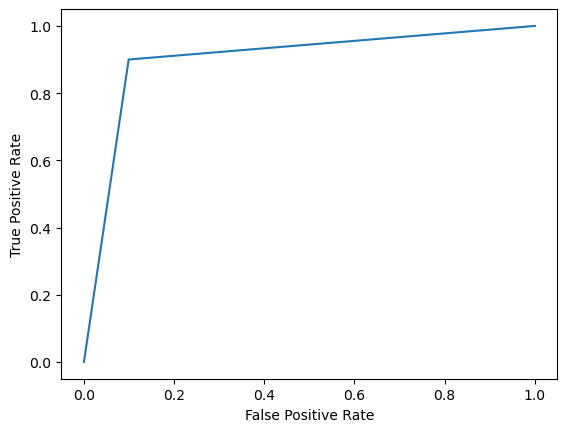

In [77]:
plot_roc_curve(y_test, y_pred_RF)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred_RF)}')

USING CROSS VALIDATION

In [78]:
from sklearn.model_selection import KFold

In [79]:
model=RandomForestClassifier()
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.94805195 0.8961039  0.88311688 0.81818182 0.8961039  0.79220779
 0.93506494 0.94805195 1.         1.        ]
0.9116883116883117


HYPER PARAMETER TUNNING OF RANDOM FOREST CLASSIFIER USING GridSearchCV

In [80]:
params = {
    'max_depth': [2,3,5,10,20,30,40],
    'criterion':['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': [1,2,3,5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [81]:
rf = RandomForestClassifier(random_state=42)

In [82]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [83]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1134 candidates, totalling 4536 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 3, 5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [84]:
grid_search.best_score_

0.8404643449419569

In [85]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, n_estimators=200,
                       random_state=42)

In [86]:
grid_predictions = grid_search.predict(X_test)

In [87]:
# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       121
           1       0.89      0.91      0.90       110

    accuracy                           0.90       231
   macro avg       0.90      0.90      0.90       231
weighted avg       0.90      0.90      0.90       231



model 1 AUC score: 0.9049586776859504


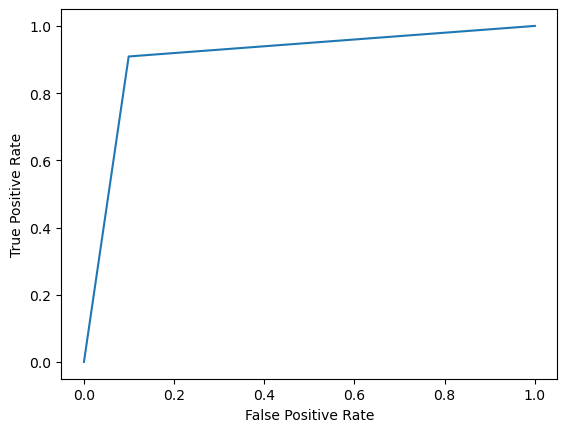

In [88]:
plot_roc_curve(y_test, grid_predictions) 
print(f'model 1 AUC score: {roc_auc_score(y_test, grid_predictions)}')

FEATURE IMPORTANCE

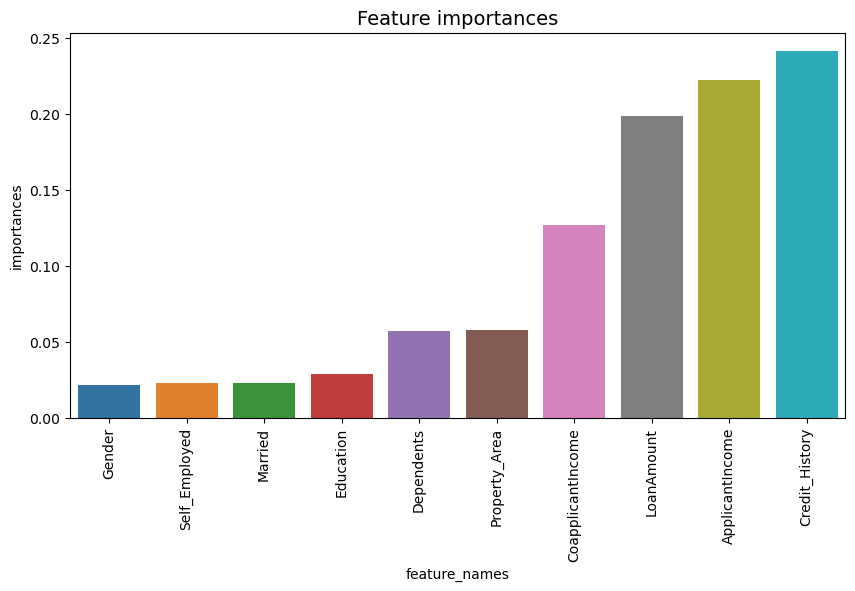

In [89]:
# Creating importances_df dataframe
importances_df = pd.DataFrame({"feature_names" : clf.feature_names_in_, 
                               "importances" : clf.feature_importances_})
#importances_df.sort_values('importances')
plt.figure(figsize=(10, 5))
# Plotting bar chart, g is from graph
g = sns.barplot(x=importances_df["feature_names"], 
                y=importances_df["importances"],
               order=importances_df.sort_values('importances').feature_names)

plt.xticks( rotation ='vertical')
g.set_title("Feature importances", fontsize=14);  



CHECK FOR OVERFITTING

In [90]:
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             grid_search.predict(X_train))*100)
print('test Accuracy : ',
      metrics.accuracy_score(y_test,
                             grid_search.predict(X_test))*100)

Training Accuracy :  100.0
test Accuracy :  90.47619047619048


In [91]:

rand_score=clf.score(X_train, y_train)
'''rand_score=classifier.accuracy_score(y_test,Pred)'''
print("Accuracy score of training:",rand_score)

Accuracy score of training: 1.0


In [92]:

rand_score=clf.score(X_test, y_test)
'''rand_score=classifier.accuracy_score(y_test,Pred)'''
print("Accuracy score of testing:",rand_score)

Accuracy score of testing: 0.9004329004329005


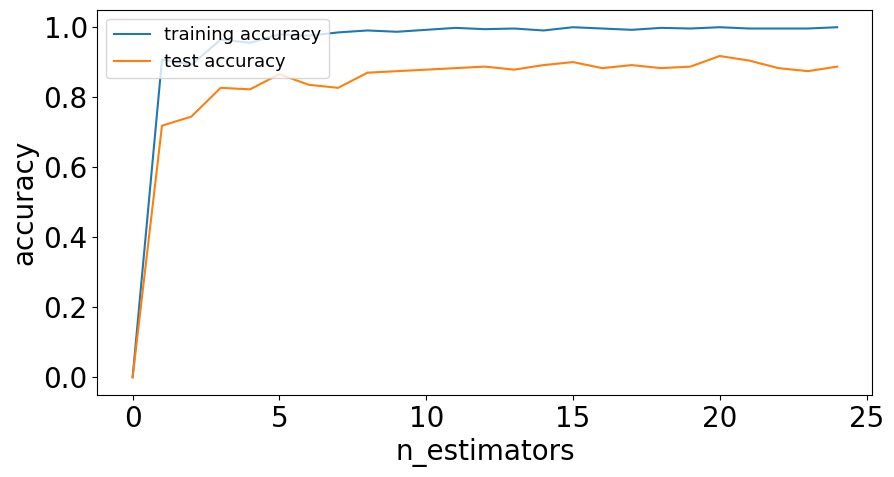

In [93]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
train_accuracies = [0]
test_accuracies = [0]
# iterate over a n_estimators values
for i in range(1, 25):
    random_forest = RandomForestClassifier(n_estimators=i)
    random_forest.fit(X_train, y_train)
    y_train_pred = random_forest.predict(X_train)
    y_test_pred = random_forest.predict(X_test)
    train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
    test_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
# create two plots using matplotlib
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label="training accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 13})
plt.xticks(range(0, 26, 5))
plt.xlabel("n_estimators", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [94]:
# pickling the model
import pickle
pickle_out = open("classifier.pkl", "wb")
pickle.dump(clf, pickle_out)
pickle_out.close()